In [2]:
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("C:\\Users\\Kruspe\\rawData.csv")
df.head(6)

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v992,v993,v994,v995,v996,v997,v998,v999,v1000,label
0,86,86,86,86,86,86,86,86,86,86,...,13,13,13,13,13,13,13,13,13,left
1,13,13,48,48,48,48,48,48,48,48,...,103,103,103,103,103,103,103,103,103,right
2,103,103,103,103,103,147,147,147,147,147,...,0,0,0,0,0,0,0,0,-9,left
3,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,120,120,120,120,120,120,120,120,120,left
4,120,120,120,120,120,120,120,120,120,120,...,-3,-3,-3,-3,-3,-3,-3,-3,-3,right
5,-3,57,57,57,57,57,57,57,57,57,...,103,103,103,103,19,19,19,19,19,right


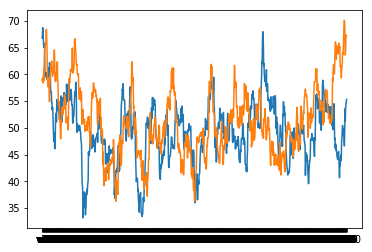

In [50]:
rdf = df.drop(['label'], axis=1)
lrdf = rdf[df.label=='left']
rrdf = rdf[df.label=='right']
lrdfm = lrdf.mean(axis=0)
rrdfm = rrdf.mean(axis=0)
plt.plot(lrdfm) 
plt.plot(rrdfm) 
plt.show() 

In [5]:
import numpy as np

In [6]:
x = np.array([])
input = rdf.iloc[0]

In [9]:
for e in input:
    x = np.append(x, int(e))

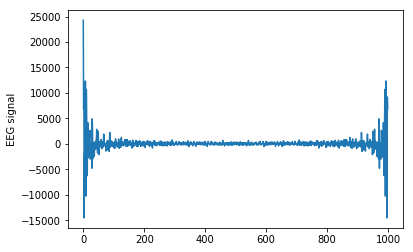

In [67]:
ff = np.fft.fft(x)
plt.plot(ff)
plt.ylabel('EEG signal')
plt.show()

In [68]:
import pywt
coeffs = pywt.wavedec(x, 'db4', level=6)
cA2,cD1,cD2,cD3,cD4,cD5,cD6 = coeffs

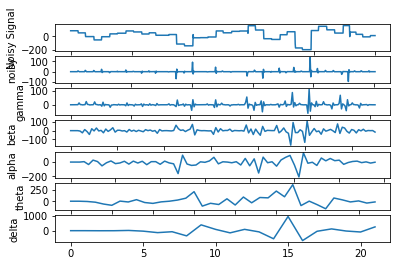

In [69]:
plt.subplot(7, 1, 1)
plt.plot(x)
plt.ylabel('Noisy Signal')
plt.subplot(7, 1, 2)
plt.plot(cD6)
plt.ylabel('noisy')
plt.subplot(7,1,3)
plt.plot(cD5)
plt.ylabel("gamma")
plt.subplot(7,1,4)
plt.plot(cD4)
plt.ylabel("beta")
plt.subplot(7,1,5)
plt.plot(cD3)
plt.ylabel("alpha")
plt.subplot(7,1,6)
plt.plot(cD2)
plt.ylabel("theta")
plt.subplot(7,1,7)
plt.plot(cD1)
plt.ylabel("delta")
plt.draw()
plt.show()

In [51]:
## Standard Derivation

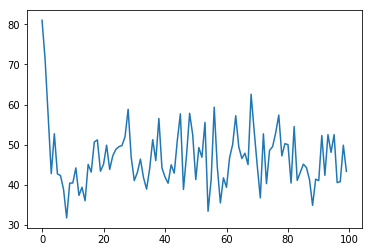

In [75]:
plt.plot(np.std(rdf, axis=1))

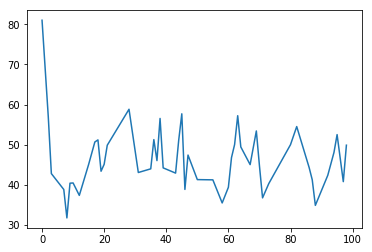

In [76]:
plt.plot(np.std(rdf[df.label=='left'], axis=1))

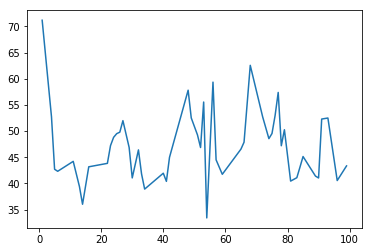

In [77]:
plt.plot(np.std(rdf[df.label=='right'], axis=1))

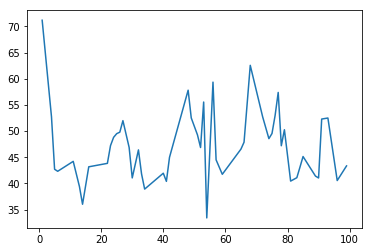

In [80]:
plt.plot(np.std(rrdf, axis=1))

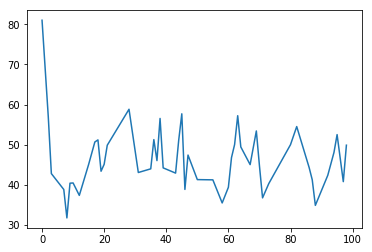

In [82]:
plt.plot(np.std(lrdf, axis=1))